# Bank Loan Default Prediction with Machine Learning

<img src='1.jpg'>

#### Problem Statement:
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

It is a classification problem where we have to predict whether a loan would be approved or not. In a classification problem, we have to predict discrete values based on a given set of independent variable(s). Classification can be of two types:

* Binary Classification : 
In this classification we have to predict either of the two given classes. For example: classifying the gender as male or female, predicting the result as win or loss, etc.
* Multiclass Classification : 
Here we have to classify the data into three or more classes. For example: classifying a movie's genre as comedy, action or romantic, classify fruits as oranges, apples, or pears, etc.

# What is hypothesis generation?
Essentially, the terms "classifier" and "model" are synonymous in certain contexts; however, sometimes people refer to "classifier" as the learning algorithm that learns the model from the training data. To makes things more tractable, let's define some of the key terminology:

* Training sample: 
A training sample is a data point x in an available training set that we use for tackling a predictive modeling task. For example, if we are interested in classifying emails, one email in our dataset would be one training sample. Sometimes, people also use the synonymous terms training instance or training example.
* Target function: 
In predictive modeling, we are typically interested in modeling a particular process; we want to learn or approximate a particular function that, for example, let's us distinguish spam from non-spam email. The target function f(x) = y is the true function f that we want to model.
* Hypothesis: 
A hypothesis is a certain function that we believe (or hope) is similar to the true function, the target function that we want to model. In context of email spam classification, it would be the rule we came up with that allows us to separate spam from non-spam emails.
* Model: 
In machine learning field, the terms hypothesis and model are often used interchangeably. In other sciences, they can have different meanings, i.e., the hypothesis would be the "educated guess" by the scientist, and the model would be the manifestation of this guess that can be used to test the hypothesis.
* Learning algorithm: 
Again, our goal is to find or approximate the target function, and the learning algorithm is a set of instructions that tries to model the target function using our training dataset. A learning algorithm comes with a hypothesis space, the set of possible hypotheses it can come up with in order to model the unknown target function by formulating the final hypothesis
* Classifier: 
A classifier is a special case of a hypothesis (nowadays, often learned by a machine learning algorithm). A classifier is a hypothesis or discrete-valued function that is used to assign (categorical) class labels to particular data points. In the email classification example, this classifier could be a hypothesis for labeling emails as spam or non-spam. However, a hypothesis must not necessarily be synonymous to a classifier. In a different application, our hypothesis could be a function for mapping study time and educational backgrounds of students to their future SAT scores.
* So, we can say that a classifier is a special case of a hypothesis or model: a classifier is a function that assigns a class label to a data point.

Hypothesis Generation is  very important stage in any data science/machine learning pipeline. It involves understanding the problem in detail by brainstorming as many factors as possible which can impact the outcome. It is done by understanding the problem statement thoroughly and before looking at the data.

Below are some of the factors which I think can affect the Loan Approval (dependent variable for this loan prediction problem):

- Salary: Applicants with high income should have more chances of loan approval.
- Previous history: Applicants who have repayed their previous debts should have higher chances of loan approval.
- Loan amount: Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.
- Loan term: Loan for less time period and less amount should have higher chances of approval.
- EMI: Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.

#### Data
For this practice problem, we have been given three CSV files: train, test and sample submission.

- Train file will be used for training the model, i.e. our model will learn from this file. It contains all the independent variables and the target variable.
- Test file contains all the independent variables, but not the target variable. We will apply the model to predict the target variable for the test data.
- Sample submission file contains the format in which we have to submit our predictions.

##### Loading Packages

In [434]:
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings                        # To ignore any warnings warnings.filterwarnings("ignore")

In [435]:
# Reading data
train=pd.read_csv("train.csv") 
test=pd.read_csv("test.csv")

* Let’s make a copy of train and test data so that even if we have to make any changes in these datasets we would not lose the original datasets.



In [436]:
train_original=train.copy() 
test_original=test.copy()

In [437]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [438]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


##### Lets check the structure of the data

In [439]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [440]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

We have 12 independent variables and 1 target variable, i.e. Loan_Status in the train dataset. Let’s also have a look at the columns of test dataset.

##### Let’s look at the shape of the dataset.



In [447]:
train.shape, test.shape

((614, 13), (367, 12))

We have 614 rows and 13 columns in the train dataset and 367 rows and 12 columns in test dataset.

#### Univariate Analysis

Univariate Analysis is analysing each column separately. For categorical features we can use frequency table or bar plots which will calculate the number of each category in a particular variable. For numerical features, probability density plots can be used to look at the distribution of the variable.

##### Target Variable

Lets look at the target variable i.e. Loan_status. As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot. 

In [452]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [453]:
# Normalize can be set to True to print proportions instead of number 
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

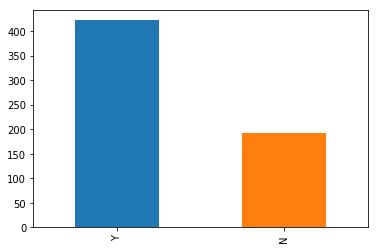

In [454]:
train['Loan_Status'].value_counts().plot.bar()

The loan of 422(around 69%) people out of 614 was approved.

Now lets visualize each variable separately. Different types of variables are Categorical, ordinal and numerical.

- Categorical features: These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)
- Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area)
- Numerical features: These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)

Let’s visualize the categorical and ordinal features first.

##### Independent Variable (Categorical)

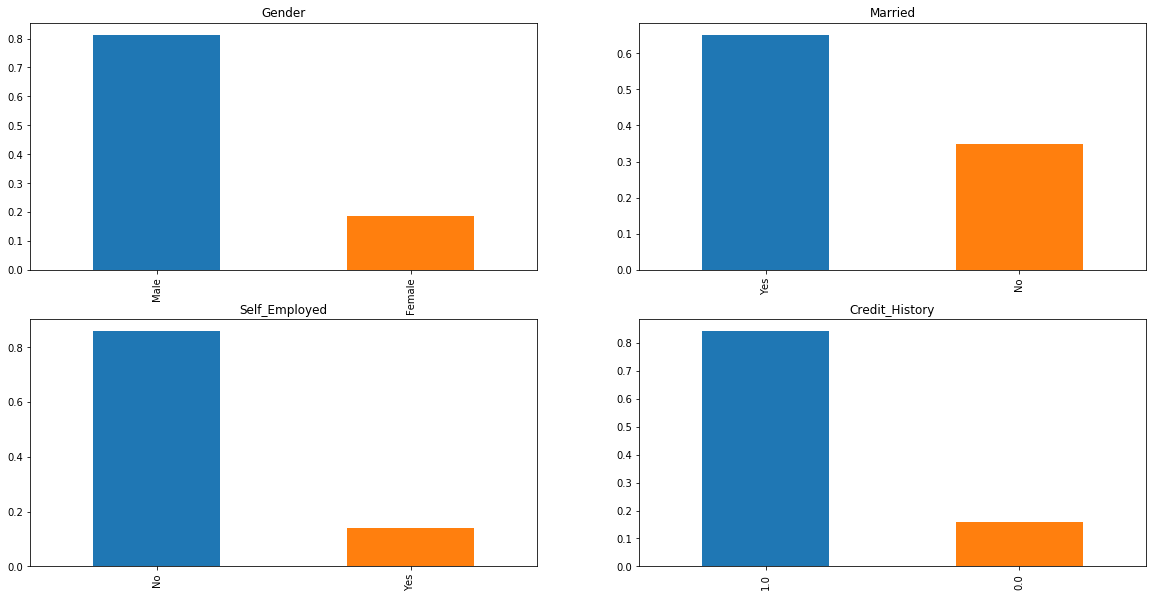

In [455]:
plt.figure(1) 
plt.subplot(221) 
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 
plt.subplot(222) 
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(223) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(224) 
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.show()

It can be inferred from the above bar plots that:

- 80% applicants in the dataset are male.
- Around 65% of the applicants in the dataset are married.
- Around 15% applicants in the dataset are self employed.
- Around 85% applicants have repaid their debts.

##### Independent Variable (Ordinal)

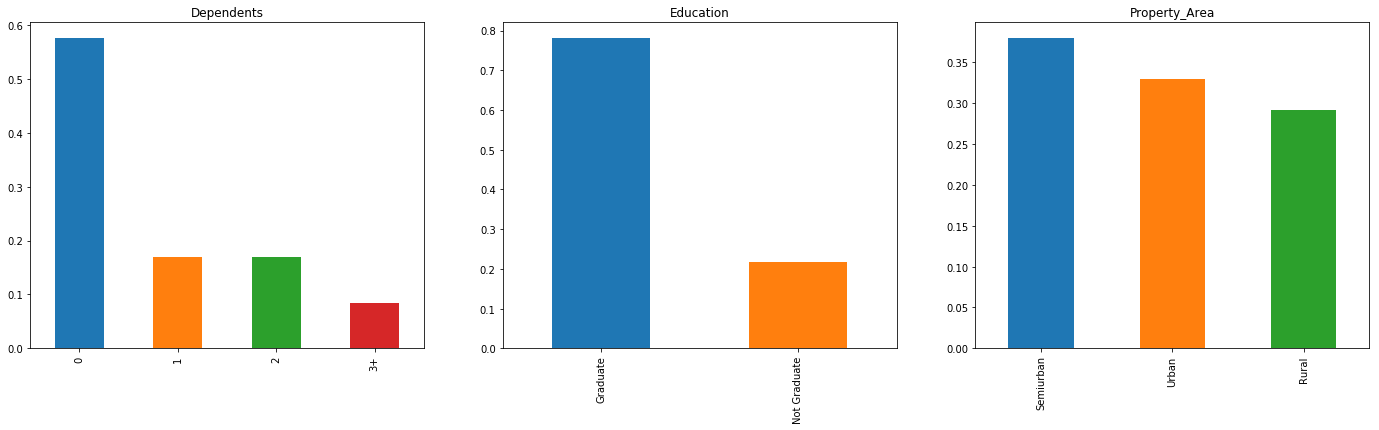

In [456]:
plt.figure(1) 
plt.subplot(131) 
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents') 
plt.subplot(132) 
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(133) 
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 
plt.show()

Following inferences can be made from the above bar plots:

- Most of the applicants don’t have any dependents.
- Around 80% of the applicants are Graduate.
- Most of the applicants are from Semiurban area.

##### Independent Variable (Numerical)

/usr/local/anaconda/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


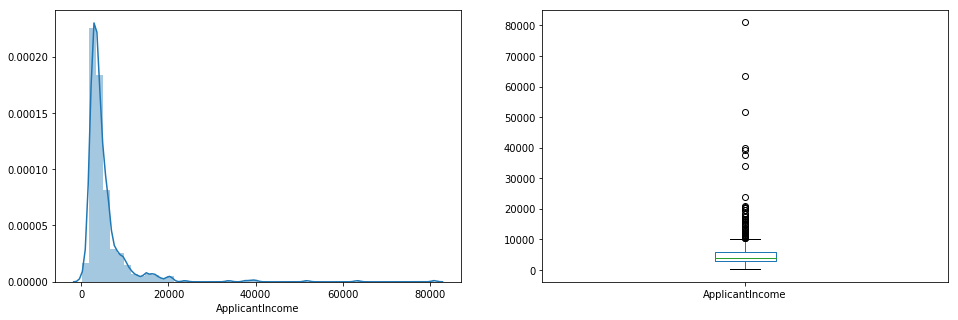

In [457]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['ApplicantIncome']); 
plt.subplot(122) 
train['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed. We will try to make it normal in later as algorithms works better if the data is normally distributed.

The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by Education:

Text(0.5, 0.98, '')

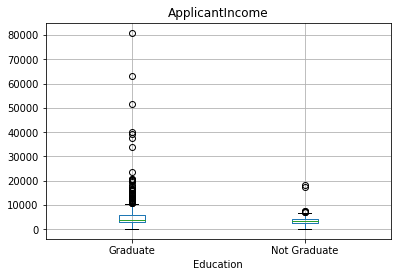

In [458]:
train.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle("")

We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

Let’s look at the Coapplicant income distribution.



/usr/local/anaconda/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


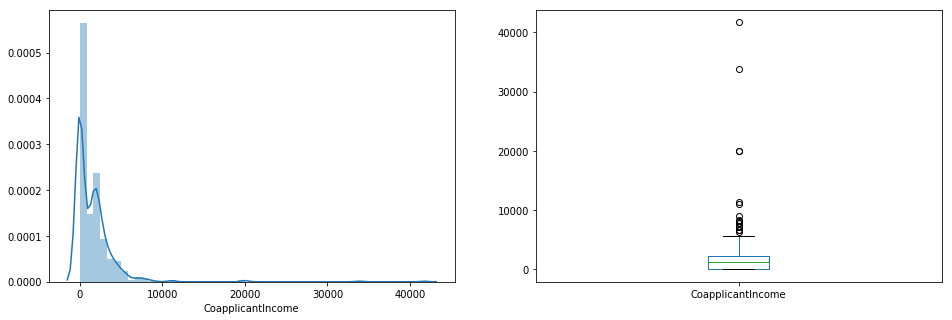

In [459]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['CoapplicantIncome']) 
plt.subplot(122) 
train['CoapplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

We see a similar distribution as that of the applicant income. Majority of coapplicant’s income ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed.

Let’s look at the distribution of LoanAmount variable.

/usr/local/anaconda/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


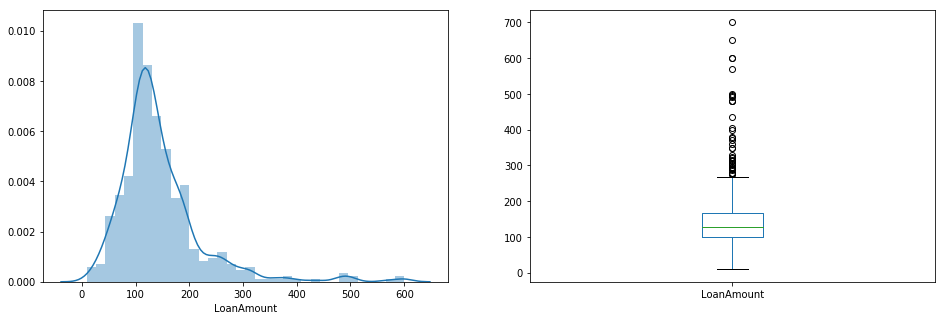

In [460]:
plt.figure(1) 
plt.subplot(121) 
df=train.dropna() 
sns.distplot(df['LoanAmount']); 
plt.subplot(122) 
train['LoanAmount'].plot.box(figsize=(16,5)) 
plt.show()

We see a lot of outliers in this variable and the distribution is fairly normal. We will treat the outliers later.

##### Bivariate Analysis

Lets recall some of the hypotheses that we generated earlier:

- Applicants with high income should have more chances of loan approval.
- Applicants who have repaid their previous debts should have higher chances of loan approval.
- Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.
- Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.

##### Categorical Independent Variable vs Target Variable

First of all we will find the relation between target variable and categorical independent variables. Let us look at the stacked bar plot now which will give us the proportion of approved and unapproved loans.


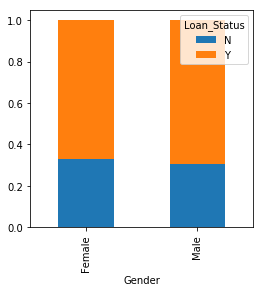

In [461]:

Gender=pd.crosstab(train['Gender'],train['Loan_Status']) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

It can be inferred that the proportion of male and female applicants is more or less same for both approved and unapproved loans.

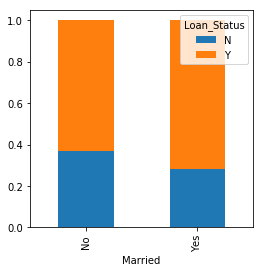

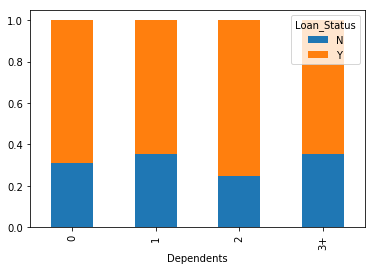

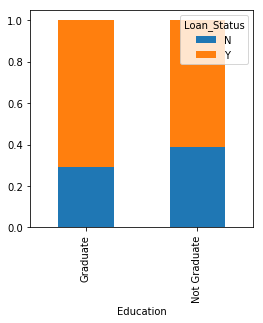

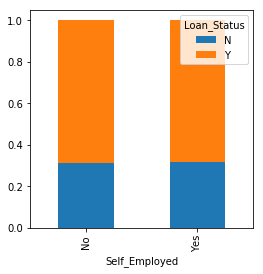

In [462]:
Married=pd.crosstab(train['Married'],train['Loan_Status']) 
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status']) 
Education=pd.crosstab(train['Education'],train['Loan_Status']) 
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status']) 
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show() 
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()

- Proportion of married applicants is higher for the approved loans.
- Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
- There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

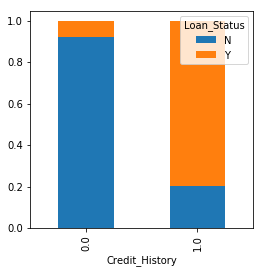

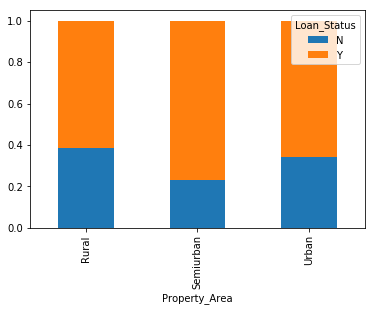

In [463]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status']) 
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status']) 
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show()

- It seems people with credit history as 1 are more likely to get their loans approved.
- Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

##### Numerical Independent Variable vs Target Variable

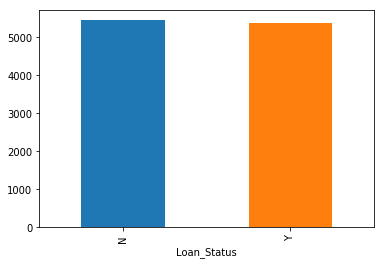

In [464]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Here the y-axis represents the mean applicant income. We don’t see any change in the mean income. So, let’s make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

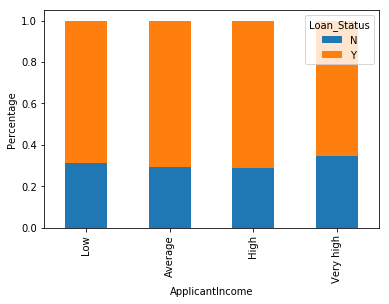

In [465]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('ApplicantIncome') 
P = plt.ylabel('Percentage')

It can be inferred that Applicant income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high.

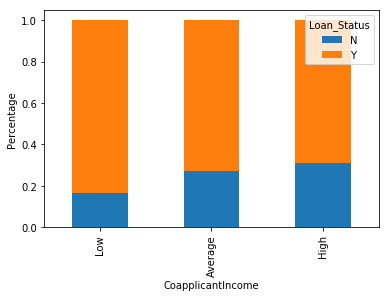

In [466]:
bins=[0,1000,3000,42000] 
group=['Low','Average','High'] 
train['Coapplicant_Income_bin']=pd.cut(df['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status']) 
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('CoapplicantIncome') 
P = plt.ylabel('Percentage')

Now lets look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.

Let’s drop the bins which we created for the exploration part. We will change the 3+ in dependents variable to 3 to make it a numerical variable.We will also convert the target variable’s categories into 0 and 1 so that we can find its correlation with numerical variables. One more reason to do so is few models like logistic regression takes only numeric values as input. We will replace N with 0 and Y with 1.

In [470]:
train=train.drop(['Income_bin', 'Coapplicant_Income_bin'], axis=1)

In [471]:
train['Dependents'].replace('3+', 3,inplace=True) 
test['Dependents'].replace('3+', 3,inplace=True)

In [472]:
train['Loan_Status'].replace('N', 0,inplace=True) 
train['Loan_Status'].replace('Y', 1,inplace=True)

###### Now lets look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.

In [473]:
matrix = train.corr() 

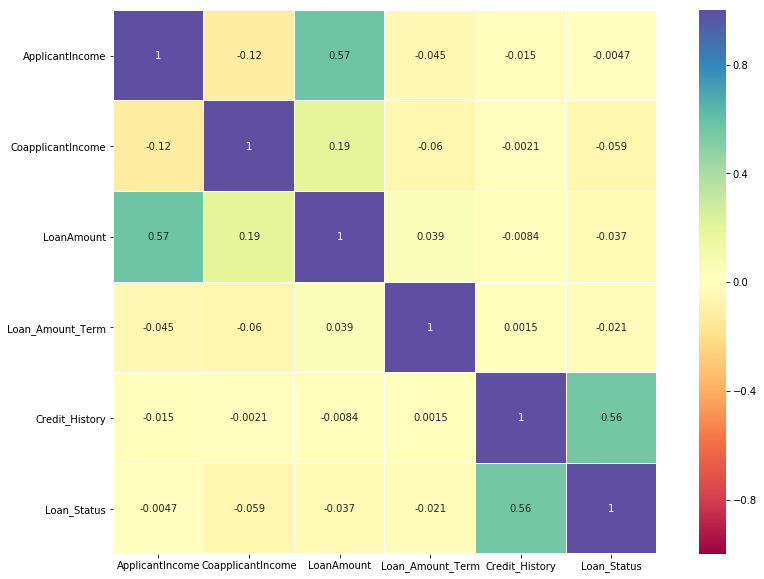

In [476]:
f, ax = plt.subplots(figsize=(15, 10)) 
sns.heatmap(matrix, vmax=1,vmin=-1, square=True, annot=True, cmap='Spectral',linecolor="white", linewidths=0.01, ax=ax)

We see that the most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status). LoanAmount is also correlated with CoapplicantIncome.

##### Data Prepreprocessing

##### Missing value imputation

In [477]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [478]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History features.

We will treat the missing values in all the features one by one.

We can consider these methods to fill the missing values:

- For numerical variables: imputation using mean or median
- For categorical variables: imputation using mode

There are very less missing values in Gender, Married, Dependents, Credit_History and Self_Employed features so we can fill them using the mode of the features.



In [480]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True) 
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True) 
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)

Now let’s try to find a way to fill the missing values in Loan_Amount_Term. We will look at the value count of the Loan amount term variable.

In [481]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

It can be seen that in loan amount term variable, the value of 360 is repeating the most. So we will replace the missing values in this variable using the mode of this variable.


In [482]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [483]:
test['Loan_Amount_Term'].value_counts()

360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
6.0        1
120.0      1
36.0       1
350.0      1
12.0       1
60.0       1
Name: Loan_Amount_Term, dtype: int64

In [484]:
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)

Now we will see the LoanAmount variable. As it is a numerical variable, we can use mean or median to impute the missing values. We will use median to fill the null values as earlier we saw that loan amount have outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.

In [485]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)

In [487]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [488]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

##### Outlier Treatment

As we saw earlier in univariate analysis, LoanAmount contains outliers so we have to treat them as the presence of outliers affects the distribution of the data. Let's examine what can happen to a data set with outliers. For the sample data set:

1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4

Mean = 2.58

Median = 2.5

Mode = 2

Standard Deviation = 1.08

If we add an outlier to the data set:

1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4, 400

The new values of our statistics are:

Mean = 35.38

Median = 2.5

Mode = 2

Standard Deviation = 114.74

It can be seen that having outliers often has a significant effect on the mean and standard deviation and hence affecting the distribution. We must take steps to remove outliers from our data sets.

Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness. One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. So, we get a distribution similar to normal distribution.

Let’s visualize the effect of log transformation. We will do the similar changes to the test file simultaneously.

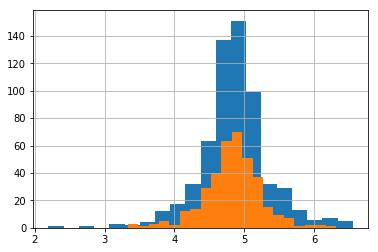

In [489]:
train['LoanAmount_log'] = np.log(train['LoanAmount']) 
train['LoanAmount_log'].hist(bins=20) 
test['LoanAmount_log'] = np.log(test['LoanAmount'])
test['LoanAmount_log'].hist(bins=20) 

In [490]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,4.852030
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1,5.587249
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,1,4.553877
7,LP001014,Male,Yes,3,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,0,5.062595
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,1,5.123964
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,0,5.855072


# Onehotencoding with pandas

In [491]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [492]:
target=train['Loan_Status']

In [493]:
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [514]:
train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log,Gender_Female,Gender_Male,Married_No,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,1,4.852030,0,1,1,...,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,4.852030,0,1,0,...,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,1,4.189655,0,1,0,...,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,1,4.787492,0,1,0,...,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,4.948760,0,1,1,...,1,0,0,1,0,1,0,0,0,1
5,5417,4196.0,267.0,360.0,1.0,1,5.587249,0,1,0,...,0,0,1,1,0,0,1,0,0,1
6,2333,1516.0,95.0,360.0,1.0,1,4.553877,0,1,0,...,1,0,0,0,1,1,0,0,0,1
7,3036,2504.0,158.0,360.0,0.0,0,5.062595,0,1,0,...,0,0,0,1,0,1,0,0,1,0
8,4006,1526.0,168.0,360.0,1.0,1,5.123964,0,1,0,...,0,0,1,1,0,1,0,0,0,1
9,12841,10968.0,349.0,360.0,1.0,0,5.855072,0,1,0,...,0,1,0,1,0,1,0,0,1,0


##### Dummy Trap

In [309]:
data=train.drop(['Gender_Female','Married_No','Dependents_0','Loan_Status_Y','Loan_Status_N','Education_Graduate','Property_Area_Rural','Self_Employed_Yes','LoanAmount_log','ApplicantIncome','LoanAmount','Credit_History','CoapplicantIncome'],axis=1)

##### Spliting the train test data

In [310]:
data

,Loan_Amount_Term,Gender_Male,Married_Yes,Dependents_3,Dependents_1,Dependents_2,Education_Not Graduate,Self_Employed_No,Property_Area_Semiurban,Property_Area_Urban
0,360.0,1,0,0,0,0,0,1,0,1
1,360.0,1,1,0,1,0,0,1,0,0
2,360.0,1,1,0,0,0,0,0,0,1
3,360.0,1,1,0,0,0,1,1,0,1
4,360.0,1,0,0,0,0,0,1,0,1
5,360.0,1,1,0,0,1,0,0,0,1
6,360.0,1,1,0,0,0,1,1,0,1
7,360.0,1,1,1,0,0,0,1,1,0
8,360.0,1,1,0,0,1,0,1,0,1
9,360.0,1,1,0,1,0,0,1,1,0


In [495]:
from sklearn.model_selection import train_test_split

In [536]:
X_train, X_test, y_train, y_test = train_test_split(data,target, test_size=0.20, random_state=0)

In [537]:
X_train

,Loan_Amount_Term,Gender_Male,Married_Yes,Dependents_3,Dependents_1,Dependents_2,Education_Not Graduate,Self_Employed_No,Property_Area_Semiurban,Property_Area_Urban
90,360.0,1,1,0,0,0,0,1,1,0
533,360.0,1,0,0,1,0,0,1,1,0
452,360.0,1,1,0,0,0,0,1,0,0
355,180.0,0,0,0,0,0,0,1,0,1
266,360.0,1,1,0,0,1,0,1,1,0
118,360.0,1,1,0,0,0,0,1,0,0
144,180.0,1,1,0,0,1,0,1,0,1
403,360.0,0,0,0,0,0,1,1,1,0
603,360.0,1,0,0,0,0,0,1,0,0
366,480.0,1,0,0,0,0,0,1,1,0


# Modeling

### Logistic Regression

In [538]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [574]:
clf = LogisticRegression(random_state=0,penalty='l2').fit(X_train, y_train)

/usr/local/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [575]:
y_pred=clf.predict(X_test)

In [576]:
clf.predict_proba(X_test)

array([[0.285673  , 0.714327  ],
       [0.25218323, 0.74781677],
       [0.30073625, 0.69926375],
       [0.30073625, 0.69926375],
       [0.20566741, 0.79433259],
       [0.39581269, 0.60418731],
       [0.29113141, 0.70886859],
       [0.27741304, 0.72258696],
       [0.43713537, 0.56286463],
       [0.21185091, 0.78814909],
       [0.25218323, 0.74781677],
       [0.26764546, 0.73235454],
       [0.25218323, 0.74781677],
       [0.20566741, 0.79433259],
       [0.21185091, 0.78814909],
       [0.35952448, 0.64047552],
       [0.42980447, 0.57019553],
       [0.35666884, 0.64333116],
       [0.35981787, 0.64018213],
       [0.38312242, 0.61687758],
       [0.27419016, 0.72580984],
       [0.21185091, 0.78814909],
       [0.35300174, 0.64699826],
       [0.3437318 , 0.6562682 ],
       [0.35222564, 0.64777436],
       [0.25971723, 0.74028277],
       [0.27741304, 0.72258696],
       [0.21185091, 0.78814909],
       [0.20222573, 0.79777427],
       [0.25218323, 0.74781677],
       [0.

In [577]:
clf.score(X_test, y_test)

0.7154471544715447

In [578]:
target_names = ['Loan_status_Yes', 'Loan_status_No']
print(classification_report(y_test, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

Loan_status_Yes       0.25      0.03      0.05        33
 Loan_status_No       0.73      0.97      0.83        90

      micro avg       0.72      0.72      0.72       123
      macro avg       0.49      0.50      0.44       123
   weighted avg       0.60      0.72      0.62       123



# Random Forest

In [547]:
from sklearn.ensemble import RandomForestClassifier

In [548]:
clf = RandomForestClassifier(n_estimators=500, max_depth=5,random_state=0,criterion='entropy',)

In [549]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [550]:
y_pred=clf.predict(X_test)

In [551]:
clf.predict_proba(X_test) 

array([[0.26734587, 0.73265413],
       [0.2689911 , 0.7310089 ],
       [0.3124192 , 0.6875808 ],
       [0.3124192 , 0.6875808 ],
       [0.20948531, 0.79051469],
       [0.40849463, 0.59150537],
       [0.21509914, 0.78490086],
       [0.30995755, 0.69004245],
       [0.36968803, 0.63031197],
       [0.23754501, 0.76245499],
       [0.2689911 , 0.7310089 ],
       [0.23234175, 0.76765825],
       [0.2689911 , 0.7310089 ],
       [0.20948531, 0.79051469],
       [0.23754501, 0.76245499],
       [0.3182402 , 0.6817598 ],
       [0.31865239, 0.68134761],
       [0.2528744 , 0.7471256 ],
       [0.36852802, 0.63147198],
       [0.46991253, 0.53008747],
       [0.39131217, 0.60868783],
       [0.23754501, 0.76245499],
       [0.32433206, 0.67566794],
       [0.3441124 , 0.6558876 ],
       [0.3476112 , 0.6523888 ],
       [0.292851  , 0.707149  ],
       [0.30995755, 0.69004245],
       [0.23754501, 0.76245499],
       [0.33777763, 0.66222237],
       [0.2689911 , 0.7310089 ],
       [0.

In [552]:
clf.score(X_test, y_test)

0.7479674796747967

In [553]:
clf.score(X_train, y_train)

0.6985743380855397

In [554]:
target_names = ['Loan_status_Yes', 'Loan_status_No']
print(classification_report(y_test, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

Loan_status_Yes       0.75      0.09      0.16        33
 Loan_status_No       0.75      0.99      0.85        90

      micro avg       0.75      0.75      0.75       123
      macro avg       0.75      0.54      0.51       123
   weighted avg       0.75      0.75      0.67       123



##### SVC

In [402]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')

In [403]:
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [406]:
y_pred=clf.predict(X_test)

In [407]:
clf.score(X_test, y_test)

0.7398373983739838

In [408]:
target_names = ['Loan_status_Yes', 'Loan_status_No']
print(classification_report(y_test, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

Loan_status_Yes       0.67      0.06      0.11        33
 Loan_status_No       0.74      0.99      0.85        90

      micro avg       0.74      0.74      0.74       123
      macro avg       0.70      0.52      0.48       123
   weighted avg       0.72      0.74      0.65       123



# Standard Scaler

In [544]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_SS=scaler.fit_transform(X_train)
X_test_SS=scaler.fit_transform(X_test)

/usr/local/anaconda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/anaconda/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/anaconda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/anaconda/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [545]:
X_train

,Loan_Amount_Term,Gender_Male,Married_Yes,Dependents_3,Dependents_1,Dependents_2,Education_Not Graduate,Self_Employed_No,Property_Area_Semiurban,Property_Area_Urban
90,360.0,1,1,0,0,0,0,1,1,0
533,360.0,1,0,0,1,0,0,1,1,0
452,360.0,1,1,0,0,0,0,1,0,0
355,180.0,0,0,0,0,0,0,1,0,1
266,360.0,1,1,0,0,1,0,1,1,0
118,360.0,1,1,0,0,0,0,1,0,0
144,180.0,1,1,0,0,1,0,1,0,1
403,360.0,0,0,0,0,0,1,1,1,0
603,360.0,1,0,0,0,0,0,1,0,0
366,480.0,1,0,0,0,0,0,1,1,0


In [546]:
X_train_SS

array([[ 0.26983787,  0.47374983,  0.71143163, ...,  0.40436012,
         1.28610033, -0.70494767],
       [ 0.26983787,  0.47374983, -1.40561644, ...,  0.40436012,
         1.28610033, -0.70494767],
       [ 0.26983787,  0.47374983,  0.71143163, ...,  0.40436012,
        -0.77754432, -0.70494767],
       ...,
       [ 0.26983787,  0.47374983,  0.71143163, ...,  0.40436012,
         1.28610033, -0.70494767],
       [ 0.26983787,  0.47374983,  0.71143163, ...,  0.40436012,
        -0.77754432,  1.41854501],
       [ 0.26983787, -2.11081869,  0.71143163, ...,  0.40436012,
         1.28610033, -0.70494767]])

In [555]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')

In [556]:
clf.fit(X_train_SS, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [557]:
y_pred=clf.predict(X_test_SS)

In [558]:
clf.score(X_test_SS, y_test)

0.7317073170731707

In [559]:
target_names = ['Loan_status_Yes', 'Loan_status_No']
print(classification_report(y_test, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

Loan_status_Yes       0.50      0.06      0.11        33
 Loan_status_No       0.74      0.98      0.84        90

      micro avg       0.73      0.73      0.73       123
      macro avg       0.62      0.52      0.48       123
   weighted avg       0.68      0.73      0.65       123



##### DecisionTreeClassifier

In [560]:
from sklearn import tree

In [561]:
clf = tree.DecisionTreeClassifier()

In [562]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [565]:
y_pred=clf.predict(X_test)
clf.score(X_test, y_test)

0.7317073170731707

In [566]:
clf.score(X_train, y_train)

0.7637474541751528

In [567]:
target_names = ['Loan_status_Yes', 'Loan_status_No']
print(classification_report(y_test, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

Loan_status_Yes       0.50      0.24      0.33        33
 Loan_status_No       0.77      0.91      0.83        90

      micro avg       0.73      0.73      0.73       123
      macro avg       0.63      0.58      0.58       123
   weighted avg       0.69      0.73      0.70       123



# End Notes

In this problem, i tried to visualize and tried to understand the data. Different Classification algorithms were implemented. Models are not performing well, we can get good result by some parameter tuning. 
Thats it for this notebook, in the next, will try to perform parameter tuning.